# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.633  1  0.931 0.336 0.005   
                             age        0.035  1  0.052 0.820 0.000   
                             Kiel       2.253  1  3.315 0.070 0.017   
                             Magdeburg  5.871  1  8.639 0.004 0.043   
                             Sweden    10.533  1 15.498 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.795  1  0.798 0.373 0.004   
                             age        0.835  1  0.838 0.361 0.004   
                             Kiel       0.537  1  0.538 0.464 0.003   
                             Magdeburg  3.819  1  3.831 0.052 0.020   
                             Sweden     4.139  1  4.153 0.043 0.021   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.474  0.502    False  
                             age               0.086  0.894    False  
                             Kiel              1.154  0.159    False  
                             Magdeburg         2.432  0.015     True  
                             Sweden            3.937  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.428  0.538    False  
                             age               0.442  0.526    False  
                             Kiel              0.333  0.619    False  
                             Magdeburg         1.286  0.125    False  
                             Sweden            1.367  0.108    False  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.029  1  7.334 0.007 0.037   
                             age        0.011  1  0.080 0.777 0.000   
                             Kiel       0.318  1  2.267 0.134 0.012   
                             Magdeburg  0.534  1  3.806 0.053 0.020   
                             Sweden     1.814  1 12.934 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.769  1  3.573 0.060 0.018   
                             age        0.624  1  1.260 0.263 0.007   
                             Kiel       2.754  1  5.562 0.019 0.028   
                             Magdeburg  2.388  1  4.821 0.029 0.025   
                             Sweden    19.067  1 38.503 0.000 0.168   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.132  0.021     True  
                             age               0.109  0.851    False  
                             Kiel              0.873  0.229    False  
                             Magdeburg         1.280  0.108    False  
                             Sweden            3.386  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.220  0.121    False  
                             age               0.580  0.389    False  
                             Kiel              1.713  0.047     True  
                             Magdeburg         1.533  0.066    False  
                             Sweden            8.479  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.336         0.474  0.502    False   
                             Kiel      0.070         1.154  0.159    False   
                             Magdeburg 0.004         2.432  0.015     True   
                             Sweden    0.000         3.937  0.001     True   
                             age       0.820         0.086  0.894    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.373         0.428  0.538    False   
                             Kiel      0.464         0.333  0.619    False   
                             Magdeburg 0.052         1.286  0.125    False   
                             Sweden    0.043         1.367  0.108    False   
                             age       0.361         0.442  0.526    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.132  0.021     True  
                             Kiel      0.134         0.873  0.229    False  
                             Magdeburg 0.053         1.280  0.108    False  
                             Sweden    0.000         3.386  0.002     True  
                             age       0.777         0.109  0.851    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.060         1.220  0.121    False  
                             Kiel      0.019         1.713  0.047     True  
                             Magdeburg 0.029         1.533  0.066    False  
                             Sweden    0.000         8.479  0.000     True  
                             age       0.263         0.580  0.389    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.481     0.339     0.224         3.301     0.278
std       0.304         5.331     0.332     0.294         6.177     0.321
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.015     0.000         0.408     0.002
50%       0.119         0.923     0.239     0.061         1.217     0.121
75%       0.465         2.416     0.620     0.391         3.329     0.522
max       1.000       149.342     1.000     0.999        86.369     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_80050/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.336         0.474   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.364   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.072         1.144   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.586         0.232   
A0A075B6H7                                         AD     0.111         0.955   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.032         1.495   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.409         0.388   
S4R3U6                                             AD     0.373         0.428   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.502    False   
A0A024R0T9;K7ER74;P02655                           AD      0.109    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.161    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.724    False   
A0A075B6H7                                         AD      0.227    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.086    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.572    False   
S4R3U6                                             AD      0.538    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.132   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.491   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.277         0.558   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.258         0.589   
A0A075B6H7                                         AD     0.004         2.404   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.239         0.622   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.896         0.048   
S4R3U6                                             AD     0.060         1.220   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.021     True  
A0A024R0T9;K7ER74;P02655                           AD      0.072    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.403    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.383    False  
A0A075B6H7                                         AD      0.012     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.414     0.336     0.239         1.601     0.299
std       0.296         1.648     0.321     0.294         1.848     0.317
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.365     0.038     0.007         0.376     0.019
50%       0.116         0.934     0.234     0.085         1.069     0.160
75%       0.432         1.941     0.592     0.421         2.168     0.550
max       0.998        23.733     0.999     0.999        20.448     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model        PI      VAE
var    rejected rejected
count      1421     1421
unique        2        2
top       False    False
freq       1025      935

## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

data
                                                   frequency
protein groups                                              
A0A024QZX5;A0A087X1N8;P35237                             186
A0A024R0T9;K7ER74;P02655                                 195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...       174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                  196
A0A075B6H7                                                91
...                                                      ...
Q9Y6R7                                                   197
Q9Y6X5                                                   173
Q9Y6Y8;Q9Y6Y8-2                                          197
Q9Y6Y9                                                   119
S4R3U6                                                   126

[1421 rows x 1 columns]

## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.336         0.474  0.502   
A0A024R0T9;K7ER74;P02655                           0.043         1.364  0.109   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.072         1.144  0.161   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.586         0.232  0.724   
A0A075B6H7                                         0.111         0.955  0.227   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.318   
Q9Y6X5                                             0.032         1.495  0.086   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.409         0.388  0.572   
S4R3U6                                             0.373         0.428  0.538   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.277   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.258   
A0A075B6H7                                            False 0.004   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.239   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.896   
S4R3U6                                                False 0.060   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.132  0.021   
A0A024R0T9;K7ER74;P02655                                   1.491  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.558  0.403   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.589  0.383   
A0A075B6H7                                                 2.404  0.012   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.283   
Q9Y6X5                                                     0.622  0.361   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.157   
Q9Y6Y9                                                     0.048  0.936   
S4R3U6                                                     1.220  0.121   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    873
PI (yes) - VAE (yes)   334
PI (no)  - VAE (yes)   152
PI (yes) - VAE (no)     62
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_80050/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.336         0.474  0.502    False 0.007   
A0A075B6H7                   0.111         0.955  0.227    False 0.004   
A0A075B6H9                   0.493         0.307  0.646    False 0.019   
A0A075B6I0                   0.027         1.575  0.074    False 0.001   
A0A075B6J9                   0.027         1.563  0.076    False 0.014   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.006         2.234  0.022     True 0.118   
Q9ULP0-3;Q9ULP0-6            0.023         1.635  0.067    False 0.000   
Q9UP79                       0.372         0.429  0.537    False 0.000   
Q9UQ52                       0.073         1.134  0.164    False 0.001   
Q9Y6C2                       0.775         0.110  0.864    False 0.005   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.132  0.021     True       186  
A0A075B6H7                           2.404  0.012     True        91  
A0A075B6H9                           1.732  0.045     True       189  
A0A075B6I0                           3.194  0.002     True       194  
A0A075B6J9                           1.846  0.036     True       156  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.930  0.207    False       148  
Q9ULP0-3;Q9ULP0-6                    3.579  0.001     True       136  
Q9UP79                               4.605  0.000     True       135  
Q9UQ52                               3.296  0.002     True       188  
Q9Y6C2                               2.292  0.015     True       119  

[214 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

PI   VAE  frequency  \
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                       0.502 0.021        186   
A0A024R0T9;K7ER74;P02655                           0.109 0.072        195   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.161 0.403        174   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.724 0.383        196   
A0A075B6H7                                         0.227 0.012         91   
...                                                  ...   ...        ...   
Q9Y6R7                                             0.318 0.283        197   
Q9Y6X5                                             0.086 0.361        173   
Q9Y6Y8;Q9Y6Y8-2                                    0.182 0.157        197   
Q9Y6Y9                                             0.572 0.936        119   
S4R3U6                                             0.538 0.121        126   

                                                   Differential Analysis Comparison  
protein groups                                                                       
A0A024QZX5;A0A087X1N8;P35237                                   PI (no)  - VAE (yes)  
A0A024R0T9;K7ER74;P02655                                       PI (no)  - VAE (no)   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...             PI (no)  - VAE (no)   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                        PI (no)  - VAE (no)   
A0A075B6H7                                                     PI (no)  - VAE (yes)  
...                                                                             ...  
Q9Y6R7                                                         PI (no)  - VAE (no)   
Q9Y6X5                                                         PI (no)  - VAE (no)   
Q9Y6Y8;Q9Y6Y8-2                                                PI (no)  - VAE (no)   
Q9Y6Y9                                                         PI (no)  - VAE (no)   
S4R3U6                                                         PI (no)  - VAE (no)   

[1421 rows x 4 columns]

List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

PI   VAE  frequency  \
protein groups                                    
O15197;O15197-3          0.980 0.009        104   
O00187;O00187-2          0.999 0.030        119   
Q8N9I0                   0.989 0.030        141   
Q9NPH3;Q9NPH3-2;Q9NPH3-5 0.976 0.035        186   
H3BRQ4;K4DIB9;P50238     0.941 0.007         72   
...                        ...   ...        ...   
K7ERI9;P02654            0.043 0.054        196   
F5GY80;F5H7G1;P07358     0.057 0.046        197   
Q9NX62                   0.055 0.045        197   
P00740;P00740-2          0.053 0.043        197   
K7ERG9;P00746            0.052 0.042        197   

                         Differential Analysis Comparison  diff_qvalue  
protein groups                                                          
O15197;O15197-3                      PI (no)  - VAE (yes)        0.971  
O00187;O00187-2                      PI (no)  - VAE (yes)        0.969  
Q8N9I0                               PI (no)  - VAE (yes)        0.960  
Q9NPH3;Q9NPH3-2;Q9NPH3-5             PI (no)  - VAE (yes)        0.941  
H3BRQ4;K4DIB9;P50238                 PI (no)  - VAE (yes)        0.934  
...                                                   ...          ...  
K7ERI9;P02654                        PI (yes) - VAE (no)         0.011  
F5GY80;F5H7G1;P07358                 PI (no)  - VAE (yes)        0.011  
Q9NX62                               PI (no)  - VAE (yes)        0.010  
P00740;P00740-2                      PI (no)  - VAE (yes)        0.010  
K7ERG9;P00746                        PI (no)  - VAE (yes)        0.010  

[214 rows x 5 columns]

### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


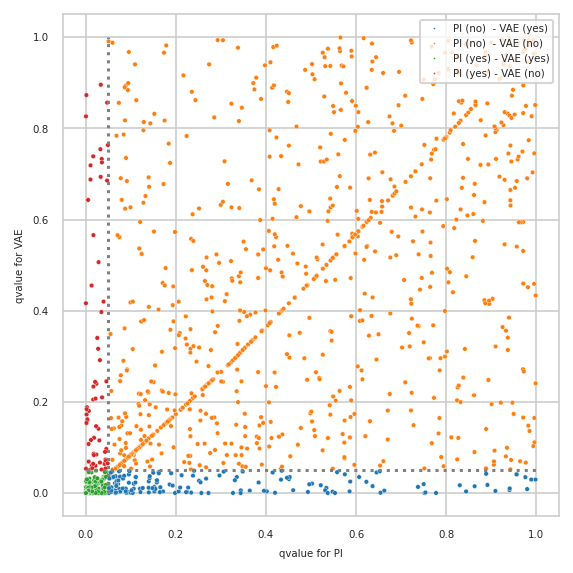

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


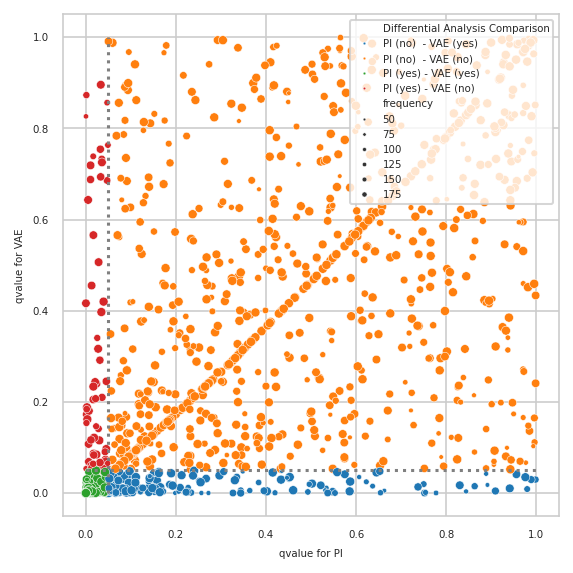

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


ENSP  score
None                            
APOE      ENSP00000252486  5.000
PSEN2     ENSP00000355747  5.000
PSEN1     ENSP00000326366  5.000
APP       ENSP00000284981  5.000
TREM2     ENSP00000362205  4.825
...                   ...    ...
ERP27     ENSP00000266397  0.681
ZNF585B   ENSP00000433773  0.681
KIR3DL2   ENSP00000325525  0.681
C12orf66  ENSP00000311486  0.681
ELP2      ENSP00000414851  0.681

[10000 rows x 2 columns]

## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out